# COLOR DETECTION PROJECT

### Project is build up using RGB colors dataset and various machine learning algorithms such KNN

<img src="img.jpg">

## Code:

In [97]:
import cv2

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
data1 = pd.read_csv('colors.csv',header=None)

In [100]:
data1.head()

,0,1,2,3,4,5
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [101]:
data1.columns = ['name1','Color_name','code','R','G','B']

In [102]:
data2 = data1.drop(['name1'],axis=1)

In [103]:
data2.head()

,Color_name,code,R,G,B
0,Air Force Blue (Raf),#5d8aa8,93,138,168
1,Air Force Blue (Usaf),#00308f,0,48,143
2,Air Superiority Blue,#72a0c1,114,160,193
3,Alabama Crimson,#a32638,163,38,56
4,Alice Blue,#f0f8ff,240,248,255


In [104]:
data2['color_code'] = data2['Color_name'] +" "+ data2['code']

In [105]:
data2.head()

,Color_name,code,R,G,B,color_code
0,Air Force Blue (Raf),#5d8aa8,93,138,168,Air Force Blue (Raf) #5d8aa8
1,Air Force Blue (Usaf),#00308f,0,48,143,Air Force Blue (Usaf) #00308f
2,Air Superiority Blue,#72a0c1,114,160,193,Air Superiority Blue #72a0c1
3,Alabama Crimson,#a32638,163,38,56,Alabama Crimson #a32638
4,Alice Blue,#f0f8ff,240,248,255,Alice Blue #f0f8ff


In [106]:
data2.drop(['Color_name','code'],axis=1,inplace=True)

In [107]:
data2.head()

,R,G,B,color_code
0,93,138,168,Air Force Blue (Raf) #5d8aa8
1,0,48,143,Air Force Blue (Usaf) #00308f
2,114,160,193,Air Superiority Blue #72a0c1
3,163,38,56,Alabama Crimson #a32638
4,240,248,255,Alice Blue #f0f8ff


In [108]:
data2.corr()

,R,G,B
R,1.000000,0.226170,0.012736
G,0.226170,1.000000,0.292491
B,0.012736,0.292491,1.000000


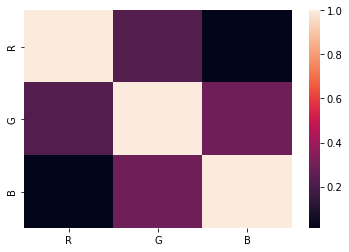

In [109]:
sns.heatmap(data2.corr())

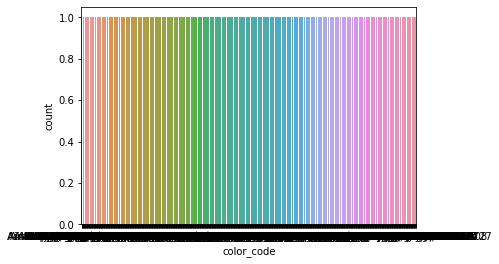

In [110]:
sns.countplot(data2['color_code'])

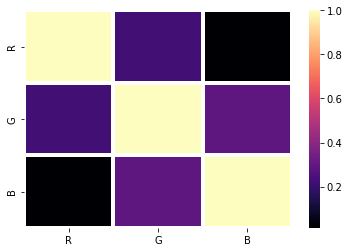

In [111]:
sns.heatmap(data2.corr(),cmap='magma',linecolor='white',linewidths=3)

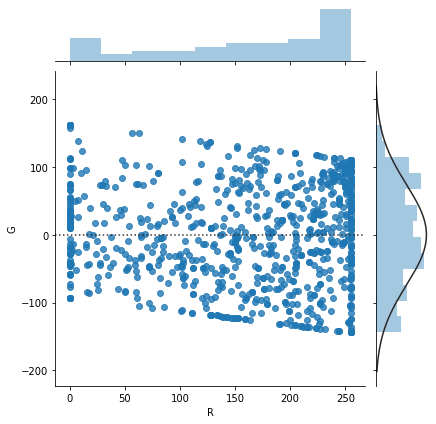

In [112]:
sns.jointplot(x='R',y='G',data=data2,kind='resid')

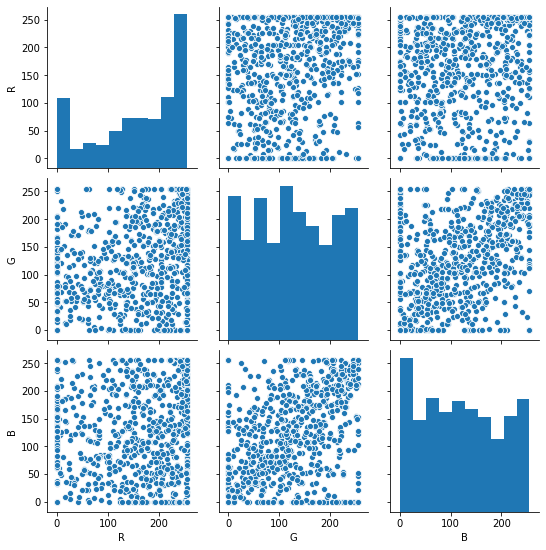

In [113]:
sns.pairplot(data2)

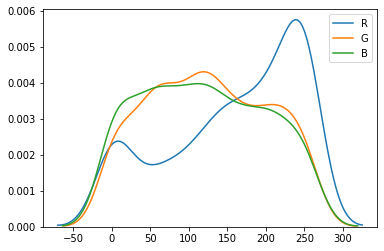

In [114]:
sns.kdeplot(data2['R'])
sns.kdeplot(data2['G'])
sns.kdeplot(data2['B'])

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X = data2.drop(['color_code'],axis=1)

In [117]:
X

,R,G,B
0,93,138,168
1,0,48,143
2,114,160,193
3,163,38,56
4,240,248,255
...,...,...,...
860,255,174,66
861,255,239,0
862,254,254,51
863,0,20,168


In [118]:
y = data2.drop(['R','G','B'],axis=1)

In [119]:
y.head()

,color_code
0,Air Force Blue (Raf) #5d8aa8
1,Air Force Blue (Usaf) #00308f
2,Air Superiority Blue #72a0c1
3,Alabama Crimson #a32638
4,Alice Blue #f0f8ff


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [121]:
X_train.shape

(692, 3)

In [122]:
y_train.shape

(692, 1)

In [123]:
X_test.shape

(173, 3)

In [124]:
y_test.shape

(173, 1)

In [125]:
X_test

,R,G,B
437,177,156,217
724,203,161,53
782,224,141,60
450,50,205,50
52,191,79,81
...,...,...,...
142,178,255,255
621,0,15,137
727,255,216,0
845,255,255,255


In [126]:
y_test.head()

,color_code
437,Light Pastel Purple #b19cd9
724,Satin Sheen Gold #cba135
782,Tiger'S Eye #e08d3c
450,Lime Green #32cd32
52,Bittersweet Shimmer #bf4f51


## K Nearest Neighbours classifier(Supervised learning)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test['color_code']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel

Text(0, 0.5, 'Error Rate')

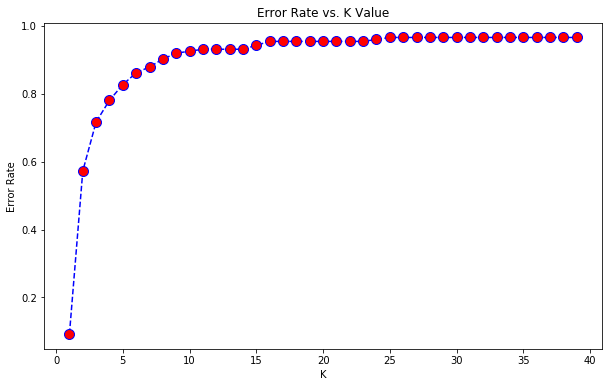

In [129]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [130]:
knnmodel = KNeighborsClassifier(n_neighbors=10)

In [131]:
knnmodel.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [132]:
prediction = knnmodel.predict(X_test)

In [133]:
prediction[0:5]

array(['Blue Bell #a2a2d0', 'Brass #b5a642', 'Bronze #cd7f32',
       'Dark Pastel Green #03c03c', 'Bittersweet Shimmer #bf4f51'],
      dtype=object)

In [134]:
knnmodel.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')>

In [135]:
new_input = [[45,45,45]]

In [136]:
knnmodel.predict(new_input)

array(['Bistre #3d2b1f'], dtype=object)

In [137]:
knnmodel.predict([[93,138,168]])

array(['Air Force Blue (Raf) #5d8aa8'], dtype=object)

In [168]:
def mouseRGB(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
        colorsB = image[y,x,0]
        colorsG = image[y,x,1]
        colorsR = image[y,x,2]
        font = cv2.FONT_HERSHEY_COMPLEX
        img2 = cv2.rectangle(image, (10, 10), (450, 50), (255, 255, 255), -1)
        img5 = cv2.putText(image, knnmodel.predict([[colorsR,colorsG,colorsB]])[0], (10, 35), font, 1, (0, 0, 0), 2, cv2.LINE_AA)
        print("Coordinates of pixel: X: ",x,"Y: ",y)
image = cv2.imread("img.jpg")
cv2.namedWindow('mouseRGB',1)
cv2.setMouseCallback('mouseRGB',mouseRGB)
#Do until esc pressed
while(1):
    cv2.imshow('mouseRGB',image)
    if cv2.waitKey(20) & 0xff==27:
        break
#if esc pressed, finish.
cv2.destroyAllWindows()

Coordinates of pixel: X:  444 Y:  386
Coordinates of pixel: X:  271 Y:  477
Coordinates of pixel: X:  202 Y:  481
Coordinates of pixel: X:  106 Y:  487
Coordinates of pixel: X:  804 Y:  520
Coordinates of pixel: X:  885 Y:  517
Coordinates of pixel: X:  1063 Y:  547


In [139]:
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
from sklearn import metrics

In [143]:
print(confusion_matrix(y_test,knnmodel.predict(X_test)))

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [144]:
print(classification_report(y_test,knnmodel.predict(X_test)))

                                            precision    recall  f1-score   support

              Air Force Blue (Raf) #5d8aa8       0.00      0.00      0.00         0
             Air Force Blue (Usaf) #00308f       0.33      1.00      0.50         1
              Air Superiority Blue #72a0c1       0.00      0.00      0.00         0
                   Alabama Crimson #a32638       0.00      0.00      0.00         0
                        Alice Blue #f0f8ff       0.00      0.00      0.00         0
                  Alizarin Crimson #e32636       0.00      0.00      0.00         0
                      Alloy Orange #c46210       0.50      1.00      0.67         1
                            Almond #efdecd       0.00      0.00      0.00         0
                          Amaranth #e52b50       0.00      0.00      0.00         0
                             Amber #ffbf00       0.00      0.00      0.00         0
                             Amethyst #96c       0.00      0.00      0.00  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
knnscore = metrics.accuracy_score(y_test,knnmodel.predict(X_test))

In [146]:
knnscore

0.07514450867052024

In [147]:
from sklearn.multioutput import MultiOutputClassifier

knn = KNeighborsClassifier(n_neighbors=10)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(X,y)

MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=10, p=2,
                                                     weights='uniform'),
                      n_jobs=-1)

In [148]:
pred = classifier.predict(X_test)

In [149]:
pred[0:5]

array([['Blue Bell #a2a2d0'],
       ['Brass #b5a642'],
       ['Bronze #cd7f32'],
       ['Dark Pastel Green #03c03c'],
       ['Bittersweet Shimmer #bf4f51']], dtype=object)

In [150]:
print(classifier.score)

<bound method MultiOutputClassifier.score of MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=10, p=2,
                                                     weights='uniform'),
                      n_jobs=-1)>


In [151]:
print(confusion_matrix(y_test,pred))

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Decision Tree Classifier(Supervised Learning algorithm)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
model = DecisionTreeClassifier()

In [154]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [155]:
pred = model.predict(X_test)

In [156]:
pred[0:5]

array(['Light Pastel Purple #b19cd9', 'Satin Sheen Gold #cba135',
       "Tiger'S Eye #e08d3c", 'Lime Green #32cd32',
       'Bittersweet Shimmer #bf4f51'], dtype=object)

In [157]:
dtscore = metrics.accuracy_score(y_test,pred)

In [158]:
dtscore

0.9132947976878613

## Random Forest Classifier(Supervised learning)

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc = RandomForestClassifier(n_estimators=600)

In [161]:
rfc.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
predictions = rfc.predict(X_test)

In [164]:
predictions[0:5]

array(['Light Pastel Purple #b19cd9', 'Satin Sheen Gold #cba135',
       "Tiger'S Eye #e08d3c", 'Lime Green #32cd32',
       'Bittersweet Shimmer #bf4f51'], dtype=object)

In [165]:
rfcscore = metrics.accuracy_score(y_test,predictions)

In [166]:
rfcscore

0.9479768786127167

## Accuracy

In [167]:
print("K NEAREST NEIGHBOURS: ")
print("Accuracy score is ",knnscore)
print("****************************************")
print("DECISION TREE: ")
print("Accuracy score is ",dtscore)
print("****************************************")
print("RANDOM FOREST CLASSIFIER: ")
print("Accuracy score is ",rfcscore)

K NEAREST NEIGHBOURS: 
Accuracy score is  0.07514450867052024
****************************************
DECISION TREE: 
Accuracy score is  0.9132947976878613
****************************************
RANDOM FOREST CLASSIFIER: 
Accuracy score is  0.9479768786127167


## Therefore, Random forest classifier is good for this dataset.

### Using Random Forest Classifier -->

In [174]:
def mouseRGB(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
        colorsB = image[y,x,0]
        colorsG = image[y,x,1]
        colorsR = image[y,x,2]
        font = cv2.FONT_HERSHEY_COMPLEX
        img2 = cv2.rectangle(image, (10, 10), (650, 50), (255, 255, 255), -1)
        img5 = cv2.putText(image, rfc.predict([[colorsR,colorsG,colorsB]])[0], (10, 35), font, 1, (0, 0, 0), 2, cv2.LINE_AA)
        print("Coordinates of pixel: X: ",x,"Y: ",y)
image = cv2.imread("img.jpg")
cv2.namedWindow('mouseRGB',1)
cv2.setMouseCallback('mouseRGB',mouseRGB)
#Do until esc pressed
while(1):
    cv2.imshow('mouseRGB',image)
    if cv2.waitKey(20) & 0xff==27:
        break
#if esc pressed, finish.
cv2.destroyAllWindows()

Coordinates of pixel: X:  197 Y:  290
Coordinates of pixel: X:  517 Y:  311
Coordinates of pixel: X:  800 Y:  356
Coordinates of pixel: X:  302 Y:  617
Coordinates of pixel: X:  79 Y:  559
Coordinates of pixel: X:  224 Y:  471
Coordinates of pixel: X:  346 Y:  445
Coordinates of pixel: X:  572 Y:  472
Coordinates of pixel: X:  606 Y:  357
Coordinates of pixel: X:  606 Y:  357
Coordinates of pixel: X:  681 Y:  486
Coordinates of pixel: X:  739 Y:  474
Coordinates of pixel: X:  303 Y:  540
Coordinates of pixel: X:  65 Y:  590
Coordinates of pixel: X:  179 Y:  589
Coordinates of pixel: X:  274 Y:  469
Coordinates of pixel: X:  530 Y:  491
Coordinates of pixel: X:  667 Y:  394
Coordinates of pixel: X:  682 Y:  227
Coordinates of pixel: X:  796 Y:  260
Coordinates of pixel: X:  888 Y:  291
Coordinates of pixel: X:  991 Y:  235
Coordinates of pixel: X:  1024 Y:  277
Coordinates of pixel: X:  745 Y:  151
Coordinates of pixel: X:  547 Y:  212
Coordinates of pixel: X:  845 Y:  250
Coordinates o